In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/workspaces/Final-Year-Project/Cleaned Data/BalancedData.csv')

# Display the first 5 rows of the data
df.head()

,SEQN,IMQ011,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,BMXBMI,BMXARML,BMXARMC,BMXWAIST,RXQ033,INDFMMPC,INQ300,HOD051,HEQ010,Diabetes Status
0,132708.0,1.0,12.0,2.0,1.0,11.0,1.0,1.0,1.0,1.0,...,38.2,32.0,36.2,118.2,1.0,2.0,2.0,5.0,2.0,0
1,138050.0,3.0,12.0,2.0,2.0,75.0,3.0,3.0,2.0,1.0,...,43.6,45.0,44.4,129.5,1.0,1.0,2.0,4.0,2.0,1
2,134168.0,1.0,12.0,2.0,1.0,36.0,3.0,3.0,1.0,1.0,...,27.8,37.3,33.3,95.8,1.0,3.0,1.0,6.0,2.0,0
3,135204.0,1.0,12.0,2.0,1.0,60.0,3.0,3.0,1.0,1.0,...,44.0,33.0,39.9,137.8,1.0,3.0,1.0,8.0,2.0,0
4,134411.0,1.0,12.0,2.0,1.0,74.0,5.0,7.0,2.0,1.0,...,17.7,34.4,26.4,76.7,1.0,3.0,1.0,6.0,2.0,1


**Selected Features**

IMQ011 = Recieved Hepatitis Vaccine

RIDAGEYR = Age

DMDHHSIZ = Total Number Of People In Household

HUQ010 = Self Percieved Health

AUQ054 = Self Percieved Hearing

OHQ845 = Self Percieved Oral Health

BMXWT = Weight KG

BMXHT = Height CM

BMXBMI = BMI

BMXARML = Arm Length CM

BMXARMC = Arm Circumfrence CM

BMXWAIST = Waist Circumference CM

RXQ033 = Taken prescription medication in last 30 days 

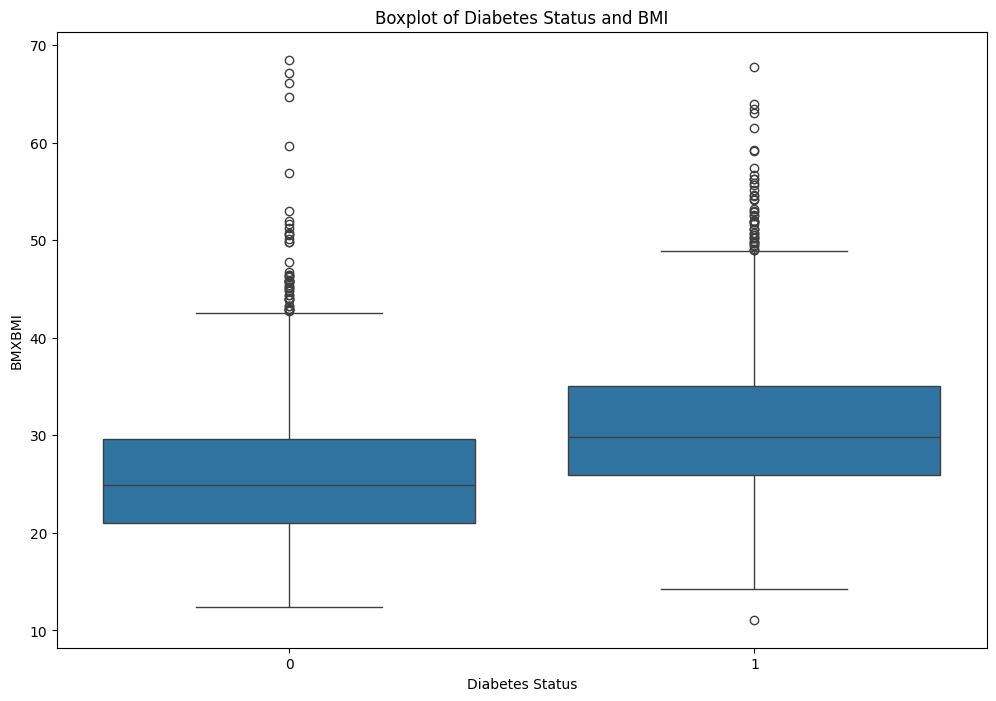

In [4]:
# Boxplot for diabetes status and BMI

plt.figure(figsize=(12, 8))
sns.boxplot(x='Diabetes Status', y='BMXBMI', data=df)
plt.title('Boxplot of Diabetes Status and BMI')

plt.show()



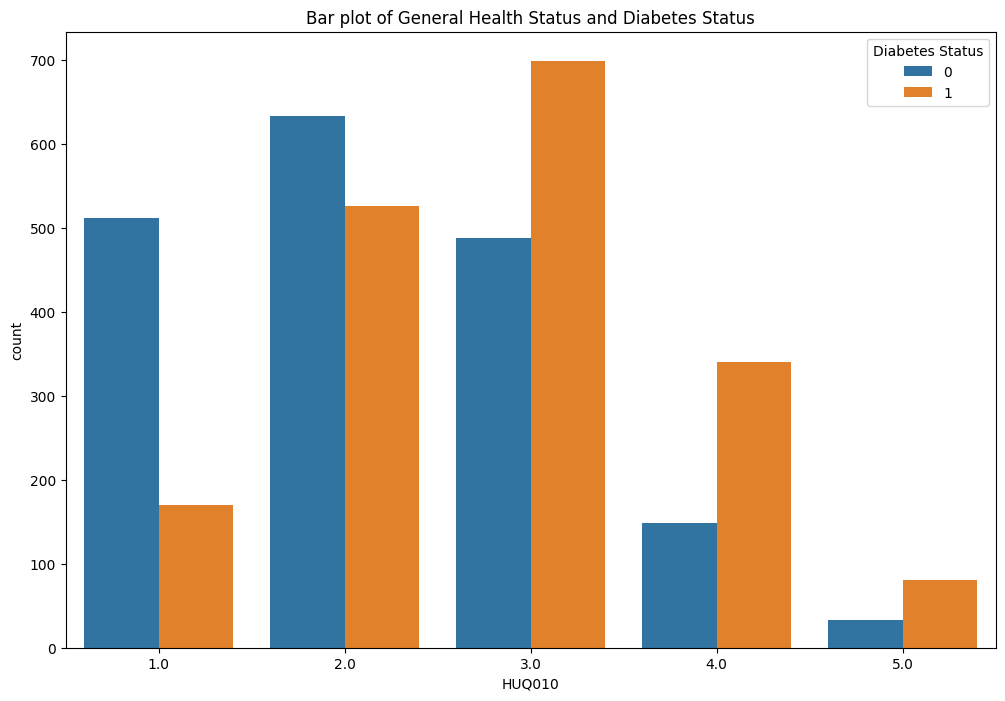

In [6]:
# bar plot of general health status and diabetes status value counts for each health value

plt.figure(figsize=(12, 8))

sns.countplot(x='HUQ010', hue='Diabetes Status', data=df)
plt.title('Bar plot of General Health Status and Diabetes Status')

plt.show()


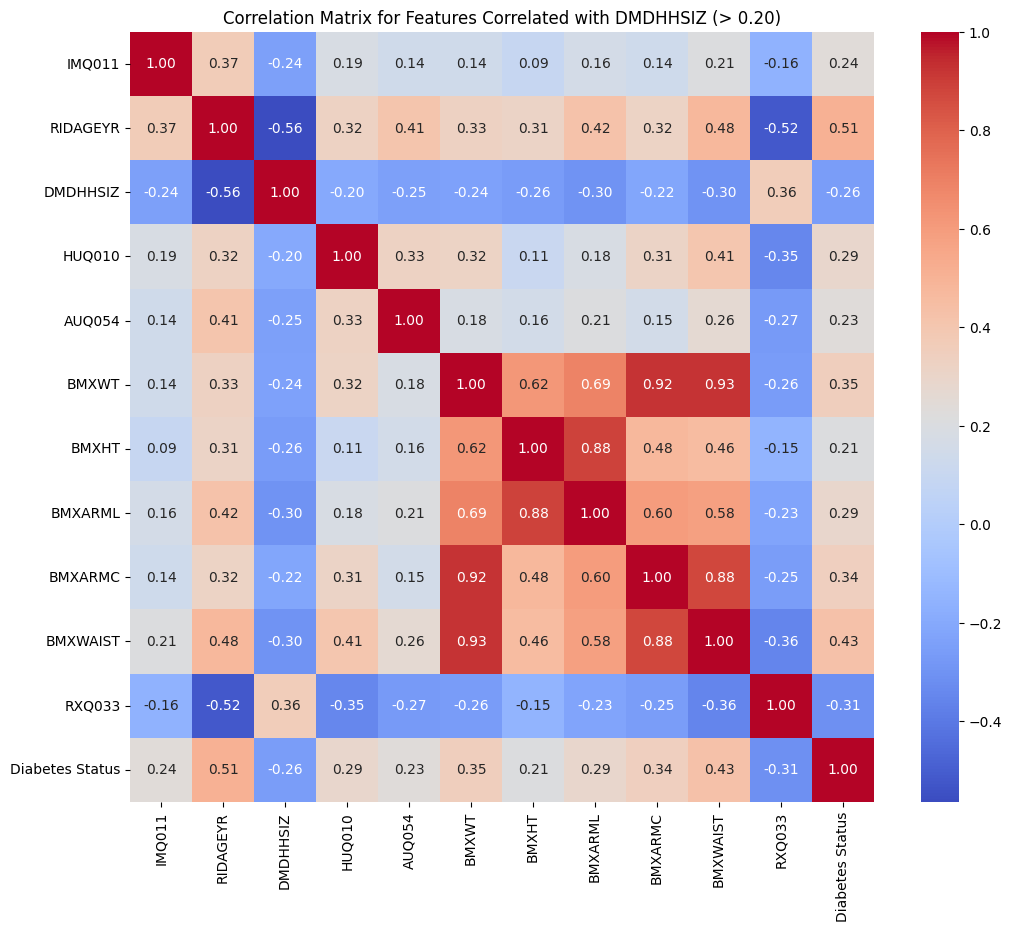

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix for the entire dataframe
df_corr = df.corr()

# Filter correlations for 'DMDHHSIZ' with absolute values above 0.20
corr_filtered = df_corr['DMDHHSIZ'].abs() > 0.20

# Get the columns that pass the filter
columns_to_keep = corr_filtered.index[corr_filtered]

# Subset the dataframe to only keep the selected columns
df_filtered = df[columns_to_keep]

# Compute the correlation matrix for the filtered columns
df_corr_filtered = df_filtered.corr()

# Plot the heatmap of the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr_filtered, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix for Features Correlated with DMDHHSIZ (> 0.20)')
plt.show()




In [16]:
# print correlations in descending abs order

df_corr_filtered['DMDHHSIZ'].sort_values(ascending=False)


DMDHHSIZ           1.000000
RXQ033             0.360164
HUQ010            -0.201463
BMXARMC           -0.217070
BMXWT             -0.238428
IMQ011            -0.241234
AUQ054            -0.246079
Diabetes Status   -0.258592
BMXHT             -0.264409
BMXARML           -0.295742
BMXWAIST          -0.300036
RIDAGEYR          -0.564229
Name: DMDHHSIZ, dtype: float64